# Entrega final curso Data Science Coder House
Proyecto: Analisis de Correlacion del rinde de cosechas y distintas variables del cultivo
    
El objetivo de este proyecto es intentar mediante metodos que aplicaria un/a Data Scientist determinar la posibilidad de prediccion de una problematica.

El proyecto contara de distintas etapas.                                                                                     
1- Presentar problema el cual vamos a trabajar. Aqui se presentaran los datos que se encontraron y determinar cuales son los mas utiles y cuales no.                                                                                                         
2- Armado de un Dataset con el cual procederemos a trabajar , se haran analisis exploratorios y se estableceran correlaciones entre los datos de haberlas.                                                                                                   
3- Se utilizaran herramientas de Machine learning para predecir la variable que nos interesa saber.




# Problema
Se intentara encontrar una correlacion entre el rinde de distintos cultivos con diversas variables obtenidas a traves de
distintos informes proporcionados por entes guvernamentales, se trabajara con los datos de la Provincia de Buenos aires y 
se propondra un modelo de machine learning que permita hacer un analisis predictivo de cuanto sera el rinde de los mismos.

In [2]:
#COMENZAMOS IMPORTANDO LAS LIBRERIAS NECESARIAS PARA EL COMIENZO (LUEGO SE AGREGARAN OTRAS SEGUN SE NECESITE)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Luego comenzamos a hacer un analisis de nuestro dataset e intentamos comprender los datos y como se comportan.

In [4]:
#Se importa el dataset de estimaciones de la Provincia y se genera una separacion para unicamente ver el cultivo Girasol
# y a partir de este cultivo intentar ver el comportamiento de los datos y asi tener una mejor comprension.

df_estimacion = pd.read_csv("Estimaciones (Provincia de BsAs 1987-2022).csv", encoding='latin-1', sep=";")
df_estimacion



,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
0,Ajo,1987/88,BUENOS AIRES,ARRECIFES,6,77,10,10,35,3500
1,Ajo,1987/88,BUENOS AIRES,BAHIA BLANCA,6,56,10,10,30,3000
2,Ajo,1987/88,BUENOS AIRES,BALCARCE,6,63,258,258,910,3527
3,Ajo,1989/90,BUENOS AIRES,BALCARCE,6,63,50,50,250,5000
4,Ajo,1990/91,BUENOS AIRES,BALCARCE,6,63,80,80,400,5000
...,...,...,...,...,...,...,...,...,...,...
29214,Trigo total,2017/18,BUENOS AIRES,ZARATE,6,882,1950,1950,8385,4300
29215,Trigo total,2018/19,BUENOS AIRES,ZARATE,6,882,2800,2800,12320,4400
29216,Trigo total,2019/20,BUENOS AIRES,ZARATE,6,882,2500,2500,10000,4000
29217,Trigo total,2020/21,BUENOS AIRES,ZARATE,6,882,3000,3000,11700,3900


In [6]:
girasol= df_estimacion.loc[:, 'Cultivo'] == 'Girasol'
df_girasol=df_estimacion.loc[girasol]

In [7]:
#Traemos el data de Girasol, en el que usaremos unicamente la campaña 2021/22 para realizar una demostracion del analisis
#general, pero en menor escala, y realizamos 2 correciones que nos serviran a futuro: ponemos de indice Departamento, ademas 
#convertimos la columna Rendimiento, de String a Float.

girasol= df_girasol.loc[:, 'Campaña'] == '2021/22'
df_uc=df_girasol.loc[girasol]
df_uc.index = df_uc["Departamento"]
df_uc['Rendimiento'] = df_uc['Rendimiento'].astype(float)
df_uc

C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\848457928.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uc['Rendimiento'] = df_uc['Rendimiento'].astype(float)


,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
Departamento,,,,,,,,,,
25 DE MAYO,Girasol,2021/22,BUENOS AIRES,25 DE MAYO,6,854,10536,10452,22601,2162.0
9 DE JULIO,Girasol,2021/22,BUENOS AIRES,9 DE JULIO,6,588,2000,2000,5400,2700.0
ADOLFO ALSINA,Girasol,2021/22,BUENOS AIRES,ADOLFO ALSINA,6,7,44000,44000,92400,2100.0
ADOLFO GONZALES CHAVES,Girasol,2021/22,BUENOS AIRES,ADOLFO GONZALES CHAVES,6,14,11061,11061,20684,1870.0
ARRECIFES,Girasol,2021/22,BUENOS AIRES,ARRECIFES,6,77,1529,1529,4434,2900.0
...,...,...,...,...,...,...,...,...,...,...
TORNQUIST,Girasol,2021/22,BUENOS AIRES,TORNQUIST,6,819,3000,3000,5400,1800.0
TRENQUE LAUQUEN,Girasol,2021/22,BUENOS AIRES,TRENQUE LAUQUEN,6,826,35547,35547,95977,2700.0
TRES ARROYOS,Girasol,2021/22,BUENOS AIRES,TRES ARROYOS,6,833,88155,88155,172784,1960.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


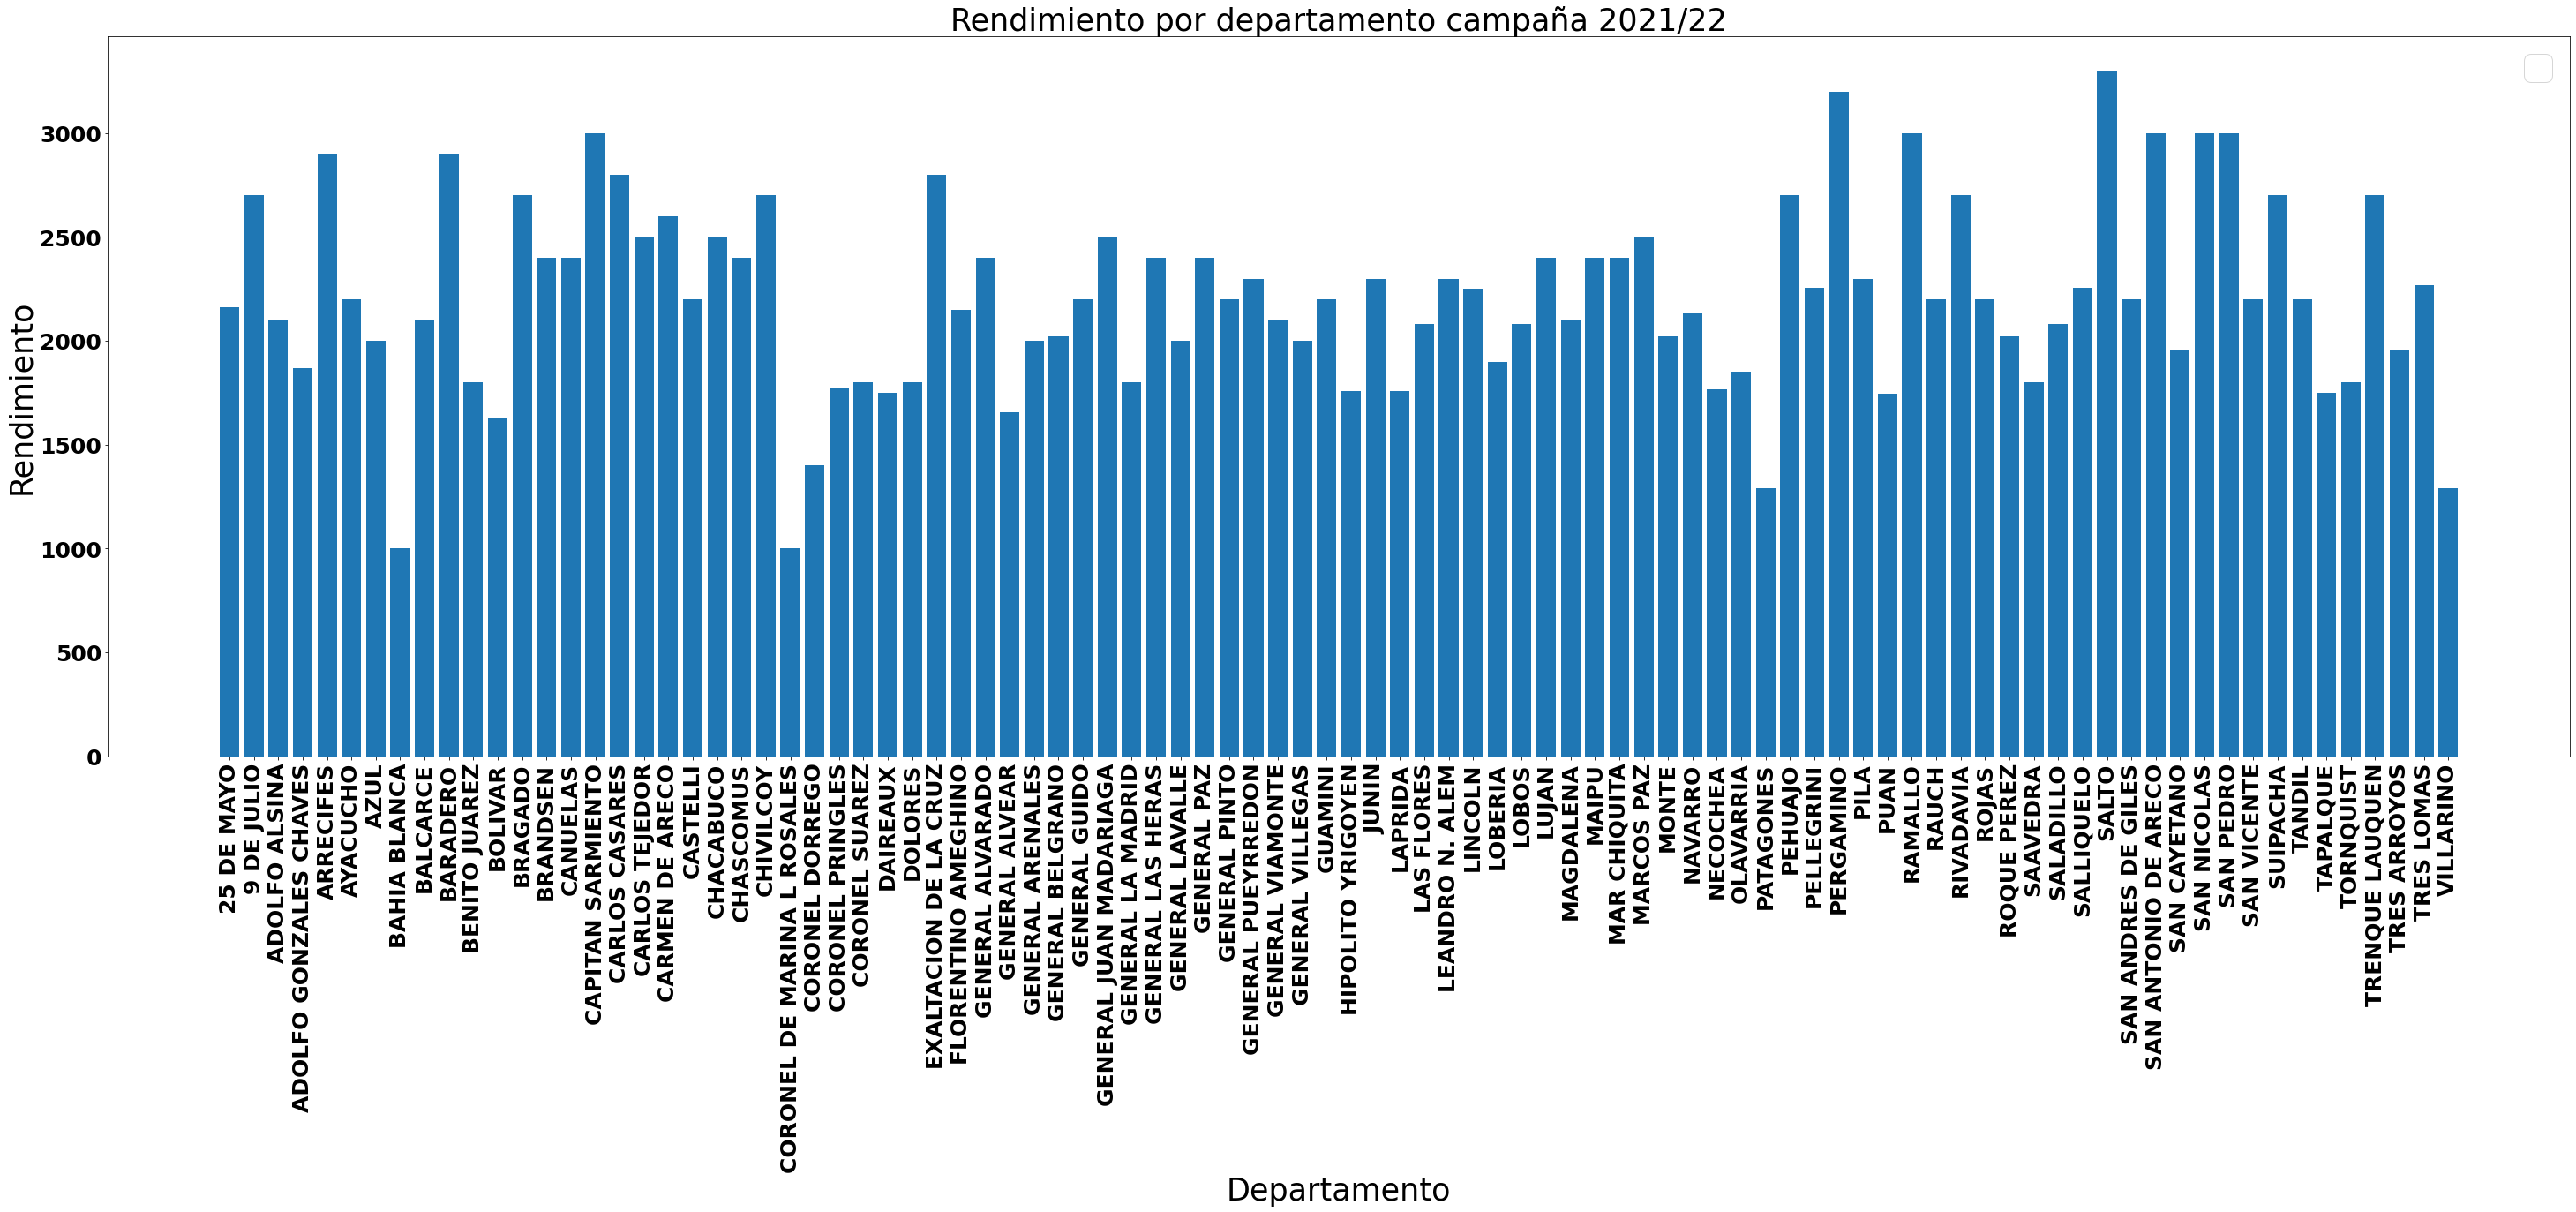

In [15]:
#El primer grafico nos muestra un analisis que indica el Rendimiento en cada uno de los Departamentos, en la campaña 2021/22.
#Al ser tantos departamentos, algunos nombres se sobreponen, estamos intentado distintas maneras de que se vea de buena manera

fig, ax = plt.subplots(figsize=(50,15))
ax.bar(df_uc["Departamento"], df_uc['Rendimiento'])
ax.set_title('Rendimiento por departamento campaña 2021/22',fontsize=35)
ax.set_ylabel('Rendimiento',fontsize=35)
ax.set_xlabel('Departamento',fontsize=35)
ax.legend(fontsize=40) 
plt.xticks(rotation = 90)
plt.xticks(fontsize = 25,weight='bold')
plt.yticks(fontsize = 25, weight='bold')


plt.show()

In [9]:
#Al igual que anteriormente, utilizaremos la campaña 2021/22 para hacer un analisis a menor escala de lo que sera el analisis
#del proyecto final. En este caso generamos un data en el que nos muestra todos los cultivos, no solamente el Girasol, en ese
#año.

cultivo= df_estimacion.loc[:, 'Campaña'] == '2021/22'
df_cultivo=df_estimacion.loc[cultivo]
df_cultivo['Rendimiento'] = df_cultivo['Rendimiento'].astype(float)
df_cultivo



C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\772658127.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cultivo['Rendimiento'] = df_cultivo['Rendimiento'].astype(float)


,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
34,Alpiste,2021/22,BUENOS AIRES,25 DE MAYO,6,854,82,82,103,1256.0
70,Alpiste,2021/22,BUENOS AIRES,ADOLFO GONZALES CHAVES,6,14,1362,1362,2043,1500.0
72,Alpiste,2021/22,BUENOS AIRES,ALBERTI,6,21,90,90,225,2500.0
107,Alpiste,2021/22,BUENOS AIRES,AYACUCHO,6,42,980,980,1470,1500.0
142,Alpiste,2021/22,BUENOS AIRES,AZUL,6,49,2573,2573,3088,1200.0
...,...,...,...,...,...,...,...,...,...,...
29086,Trigo total,2021/22,BUENOS AIRES,TRENQUE LAUQUEN,6,826,49142,49142,235882,4800.0
29121,Trigo total,2021/22,BUENOS AIRES,TRES ARROYOS,6,833,117946,117946,484392,4107.0
29148,Trigo total,2021/22,BUENOS AIRES,TRES LOMAS,6,847,11100,11100,37700,3396.0
29183,Trigo total,2021/22,BUENOS AIRES,VILLARINO,6,875,15305,10655,12803,1202.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


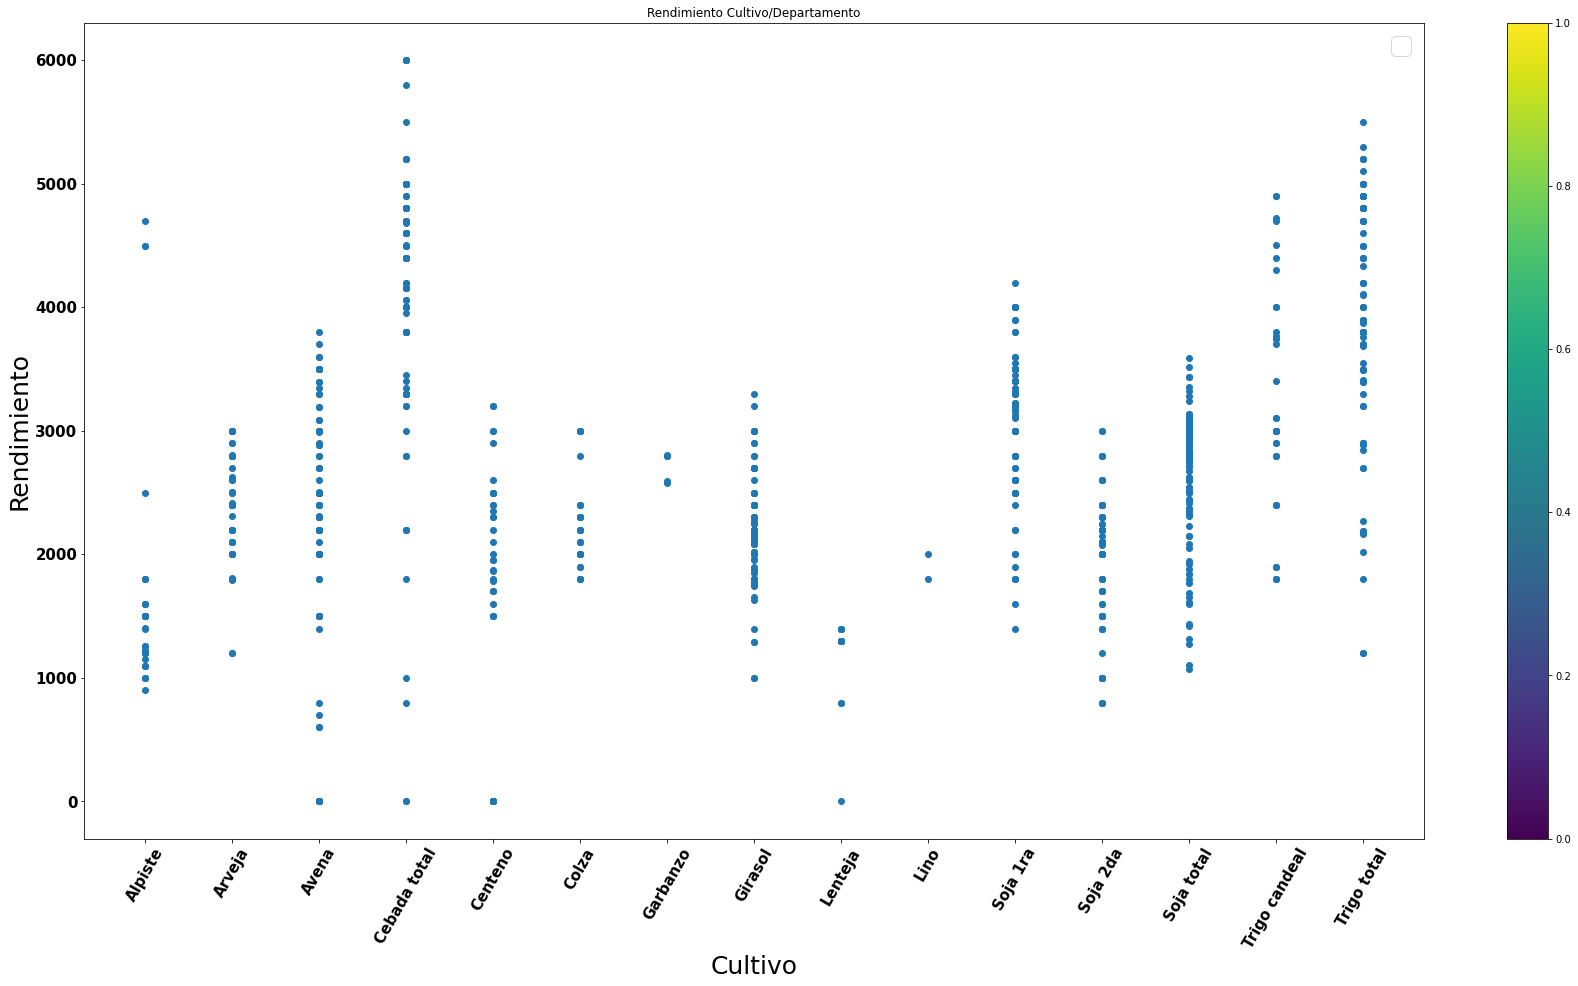

In [10]:
#El grafico muestra un analisis de cada cultivo en la campaña 2021/22, y su rendimiento en cada departamento, que no esta
#diferenciado, ya que la intencion no es ver cada departamento, si no tener graficamente un promedio (ver donde hay mas puntos)
#del rendimiento de cada cultivo en este año.

fig, ax = plt.subplots(figsize=(30,15))  
mapeo_colores = ax.scatter(df_cultivo['Cultivo'], df_cultivo['Rendimiento'])
fig.colorbar(mapeo_colores)
ax.set_title('Rendimiento Cultivo/Departamento')
ax.set_xlabel("Cultivo",fontsize=25)
ax.set_ylabel('Rendimiento',fontsize=25)
ax.legend(fontsize=25) 
plt.xticks(rotation = 60)
plt.xticks(fontsize = 15, weight='bold')
plt.yticks(fontsize = 15, weight='bold')

plt.show()



In [12]:
#Se genera el Df del departamento de Rivadavia, teniendo en cuenta unicamente la siembra de Girasol. 

girasol_est= df_girasol.loc[:, 'Departamento'] == 'RIVADAVIA'
df_girasol_riv=df_girasol.loc[girasol_est]
df_girasol_riv.index = df_girasol_riv["Campaña"]
df_girasol_riv['Rendimiento'] = df_girasol_riv['Rendimiento'].astype(float)


C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\2271615594.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_girasol_riv['Rendimiento'] = df_girasol_riv['Rendimiento'].astype(float)


In [13]:
#Se genera el Df del departamento de Saavedra, teniendo en cuenta unicamente la siembra de Girasol. 

girasol_est2= df_girasol.loc[:, 'Departamento'] == 'SAAVEDRA'
df_girasol_saa=df_girasol.loc[girasol_est2]
df_girasol_saa.index = df_girasol_saa["Campaña"]
df_girasol_saa['Rendimiento'] = df_girasol_saa['Rendimiento'].astype(float)
df_girasol_saa.head()

C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\1772361696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_girasol_saa['Rendimiento'] = df_girasol_saa['Rendimiento'].astype(float)


,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
Campaña,,,,,,,,,,
1987/88,Girasol,1987/88,BUENOS AIRES,SAAVEDRA,6,700,38500,38500,54000,1403.0
1988/89,Girasol,1988/89,BUENOS AIRES,SAAVEDRA,6,700,40000,39000,50000,1282.0
1989/90,Girasol,1989/90,BUENOS AIRES,SAAVEDRA,6,700,35000,35000,60000,1714.0
1990/91,Girasol,1990/91,BUENOS AIRES,SAAVEDRA,6,700,25000,25000,42500,1700.0
1991/92,Girasol,1991/92,BUENOS AIRES,SAAVEDRA,6,700,25000,25000,33800,1352.0


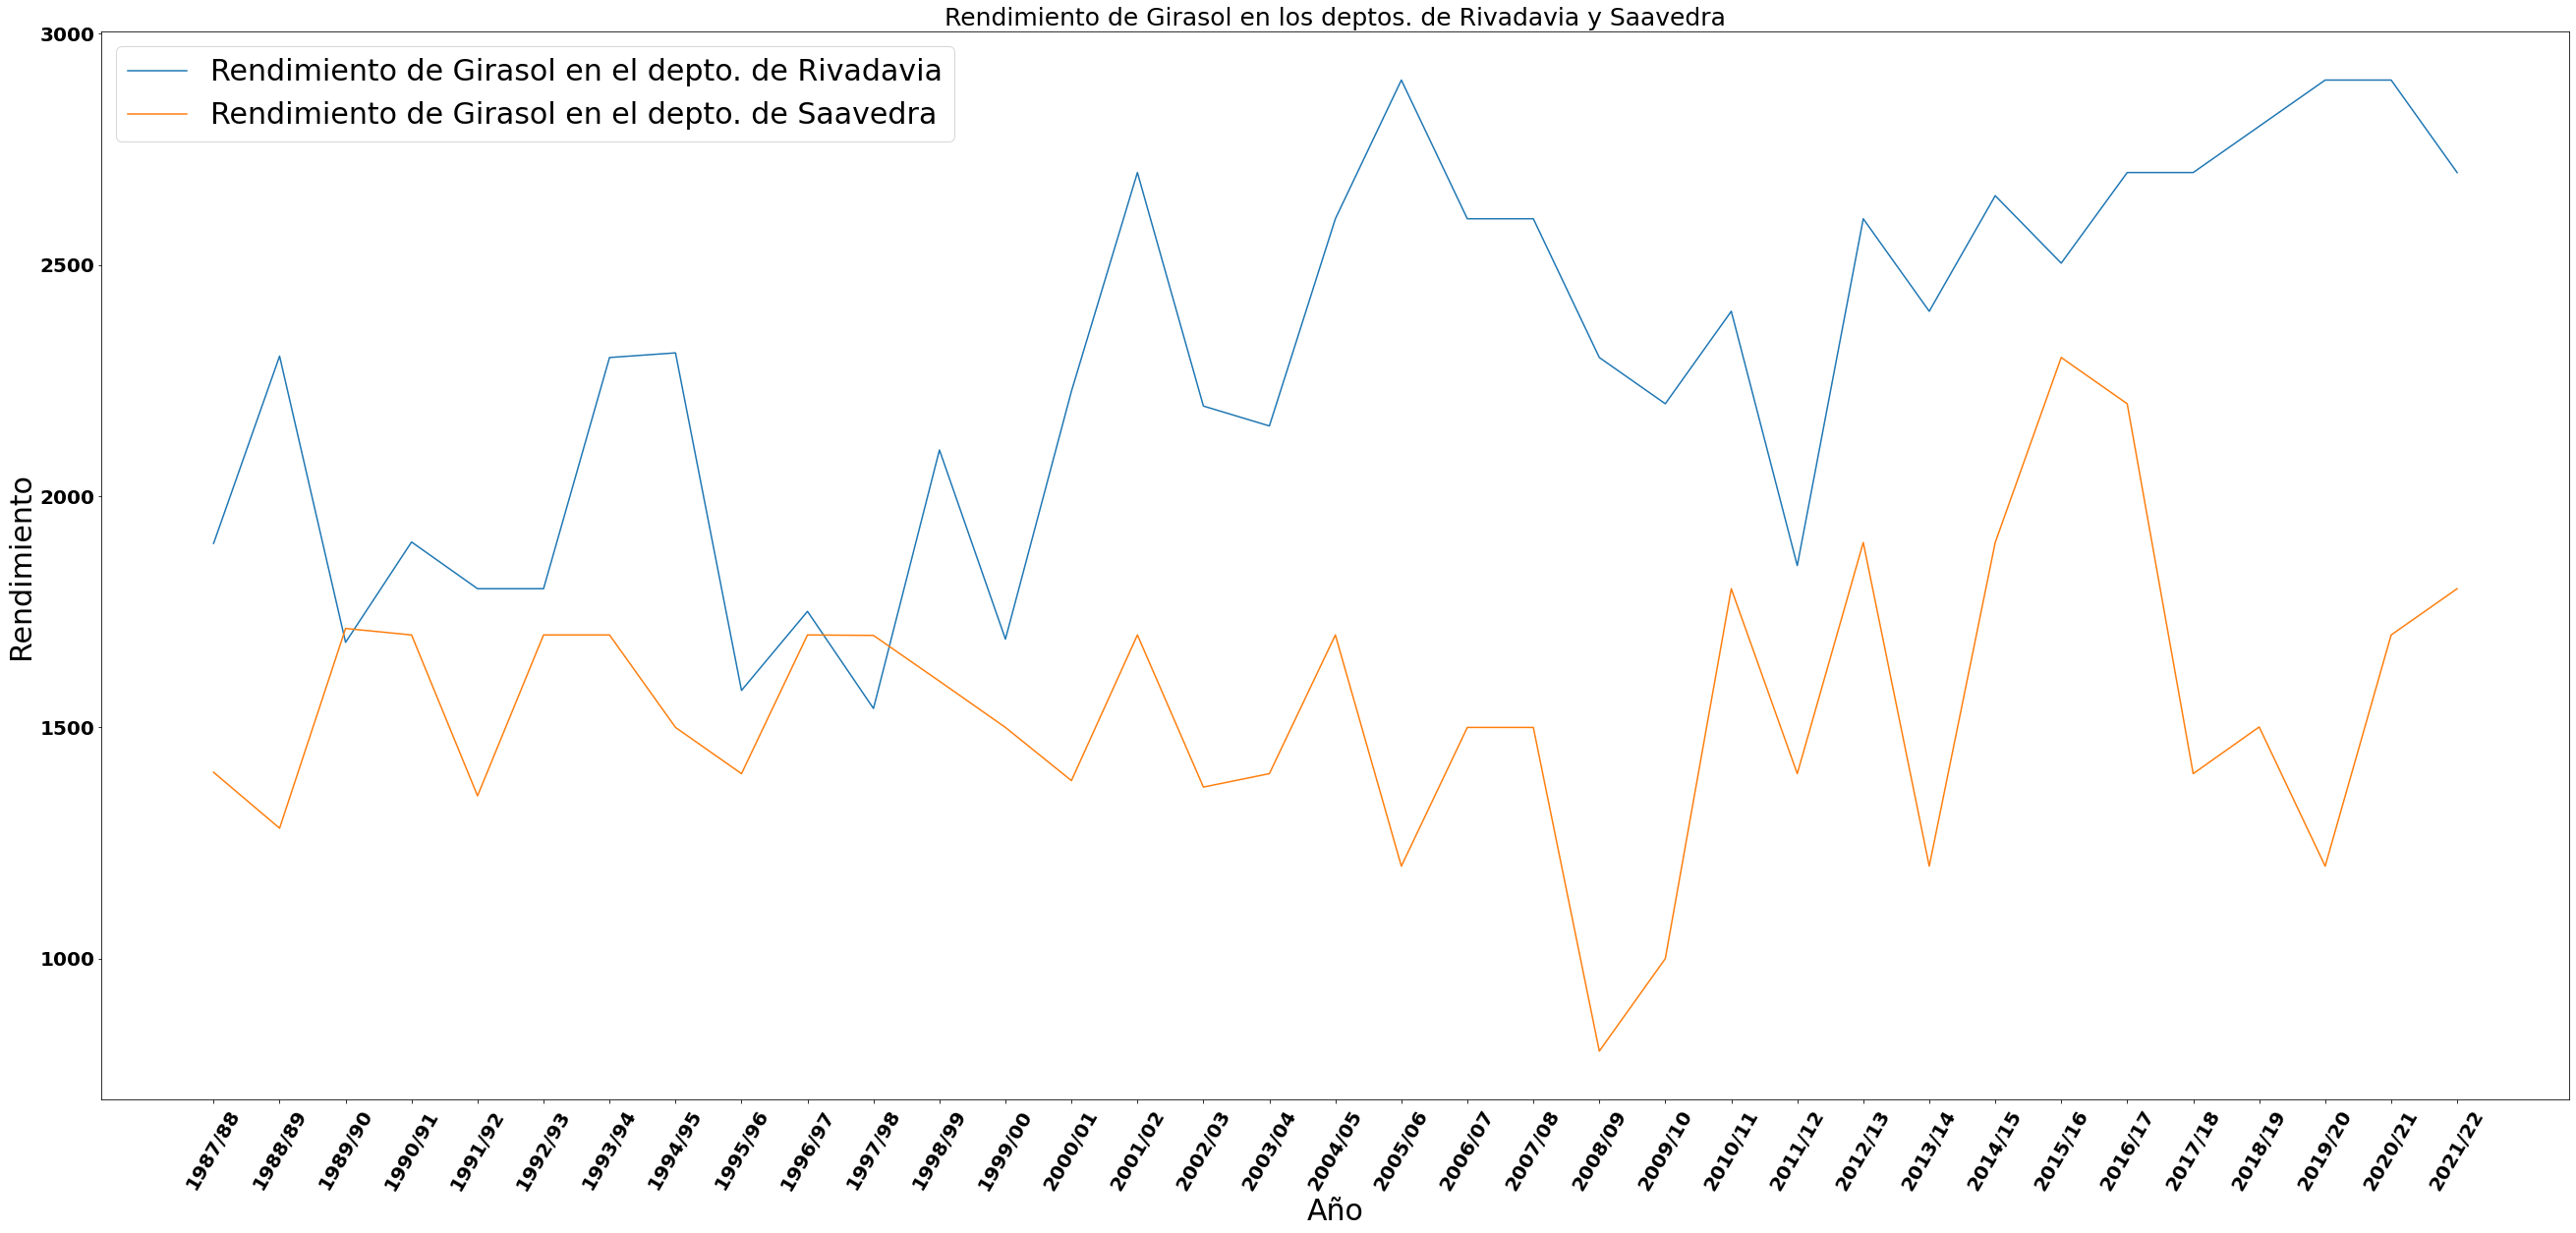

In [14]:
#Se muestran los rendimientos en el transcurso del periodo entre las campañas 1987/88 y 2021/22 de los departamentos de
#Rivadavia y Saavedra, en el que muestra una clara superioridad, exceptuando en 2 campañas, del depto. de Rivadavia. 
#Con esto se realizan 2 analisis bivariados sobre un mismo grafico, en el que el departamento no lo tomamos como un dato
#analizado, ya que unicamente esta ahi de referencia.

fig, ax = plt.subplots(figsize=(45, 20))  
ax.plot(df_girasol_riv.index, df_girasol_riv['Rendimiento'], label='Rendimiento de Girasol en el depto. de Rivadavia')
ax.plot(df_girasol_saa.index, df_girasol_saa['Rendimiento'], label='Rendimiento de Girasol en el depto. de Saavedra', color='C1')
ax.set_xlabel('Año', fontsize=30)  
ax.set_ylabel('Rendimiento', fontsize=30) 
ax.set_title('Rendimiento de Girasol en los deptos. de Rivadavia y Saavedra', fontsize=25)
ax.legend(fontsize=30) 
plt.xticks(fontsize = 20, weight='bold')
plt.xticks(rotation = 60)
plt.yticks(fontsize = 20, weight='bold')
plt.show()

Esta primera exploracion nos hizo dar cuenta como se conformaban los datos, cuales eran relevantes y que habia algunos que nos faltaban para terminar de entender ciertos comportamientos, por eso luego de esto se consiguio un dataset de clima de la provincia de dos regiones distintas, se tranformo y se adapto para cada tipo de cultivo teniendo en cuenta las precipitaciones recibidas durante su siembra (que es la principal variable climatica que afecta a los cultivos).

Se consiguen 2 datos climaticos para dos zonas muy distintas geografica y climaticamente hablando, Junin (zona norte) y Tres 
Arroyos (zona sur). A partir de ahora se trabajan con dataset adaptados a estas localidades y sus cultivos, se pone como ejemplo uno de los tratamientos de datos y luego se pasa al Dataset final.

In [16]:
df = pd.read_csv("Estimaciones (Provincia de BsAs 1987-2022).csv", encoding='latin-1', sep=";")
df

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
0,Ajo,1987/88,BUENOS AIRES,ARRECIFES,6,77,10,10,35,3500
1,Ajo,1987/88,BUENOS AIRES,BAHIA BLANCA,6,56,10,10,30,3000
2,Ajo,1987/88,BUENOS AIRES,BALCARCE,6,63,258,258,910,3527
3,Ajo,1989/90,BUENOS AIRES,BALCARCE,6,63,50,50,250,5000
4,Ajo,1990/91,BUENOS AIRES,BALCARCE,6,63,80,80,400,5000
...,...,...,...,...,...,...,...,...,...,...
29214,Trigo total,2017/18,BUENOS AIRES,ZARATE,6,882,1950,1950,8385,4300
29215,Trigo total,2018/19,BUENOS AIRES,ZARATE,6,882,2800,2800,12320,4400
29216,Trigo total,2019/20,BUENOS AIRES,ZARATE,6,882,2500,2500,10000,4000
29217,Trigo total,2020/21,BUENOS AIRES,ZARATE,6,882,3000,3000,11700,3900


In [17]:
df["Cultivo"].value_counts()

Maíz                3302
Trigo total         3285
Girasol             3159
Soja total          3060
Avena               2983
Soja 1ra            2053
Sorgo               1972
Soja 2da            1915
Cebada cervecera    1724
Alpiste              800
Trigo candeal        754
Colza                747
Centeno              667
Lino                 615
Cebada total         569
Mijo                 515
Cebada forrajera     390
Arveja               172
Papa total           124
Cebolla total         55
Limón                 52
Naranja               50
Mandarina             49
Pomelo                46
Maní                  44
Lenteja               37
Ajo                   32
Cártamo               18
Garbanzo              17
Poroto seco           13
Name: Cultivo, dtype: int64

In [18]:
#Se eligen las zonas mas cercanas a Tres Arroyos 
df_TA= df[df.Departamento.isin(["SAN CAYETANO", "ADOLFO GONZALES CHAVES","CORONEL PRINGLES","BENITO JUAREZ","LAPRIDA","CORONEL DORREGO","TRES ARROYOS"])]
df_TA.sample(30)

,Cultivo,Campaña,Provincia,Departamento,idProvincia,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
20252,Soja total,1992/93,BUENOS AIRES,ADOLFO GONZALES CHAVES,6,14,7000,4900,3400,694
18760,Soja 2da,2007/08,BUENOS AIRES,CORONEL DORREGO,6,189,12000,3600,1469,408
4093,Cebada cervecera,1995/96,BUENOS AIRES,ADOLFO GONZALES CHAVES,6,14,10000,10000,23000,2300
1856,Avena,2010/11,BUENOS AIRES,CORONEL PRINGLES,6,196,32850,13150,23670,1800
23102,Soja total,1988/89,BUENOS AIRES,TRES ARROYOS,6,833,1000,1000,1200,1200
4566,Cebada cervecera,2008/09,BUENOS AIRES,CORONEL PRINGLES,6,196,3600,3600,6840,1900
9070,Girasol,2003/04,BUENOS AIRES,CORONEL DORREGO,6,189,38000,38000,53000,1395
16416,Soja 1ra,2011/12,BUENOS AIRES,BENITO JUAREZ,6,84,68000,66000,158400,2400
1833,Avena,2019/20,BUENOS AIRES,CORONEL DORREGO,6,189,29800,4800,9600,2000
14915,Maíz,2008/09,BUENOS AIRES,SAN CAYETANO,6,742,6500,4500,15800,3511


In [19]:
# Se borran las columnas con datos innecesarios
df_TA= df_TA.drop(['Provincia', 'idProvincia',"Departamento"], axis=1)
df_TA

,Cultivo,Campaña,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
20,Ajo,1995/96,833,4,4,16,4000
36,Alpiste,1987/88,14,2000,2000,2400,1200
37,Alpiste,1988/89,14,3000,3000,2250,750
38,Alpiste,1989/90,14,2000,2000,2400,1200
39,Alpiste,1990/91,14,1800,1700,1700,1000
...,...,...,...,...,...,...,...
29117,Trigo total,2017/18,833,105070,105070,514843,4900
29118,Trigo total,2018/19,833,89875,80875,339453,4197
29119,Trigo total,2019/20,833,119000,119000,393100,3303
29120,Trigo total,2020/21,833,131000,131000,570000,4351


In [20]:
#Se eligen los cultivos relevantes 
df_TA= df_TA[df_TA.Cultivo.isin(["Alpiste","Trigo candeal","Cebada cervecera","Arveja", "Avena","Cebada total","Centeno",'Trigo total','Girasol','Maíz','Soja 1ra','Soja 2da','Sorgo'])]
df_TA

,Cultivo,Campaña,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
36,Alpiste,1987/88,14,2000,2000,2400,1200
37,Alpiste,1988/89,14,3000,3000,2250,750
38,Alpiste,1989/90,14,2000,2000,2400,1200
39,Alpiste,1990/91,14,1800,1700,1700,1000
40,Alpiste,1991/92,14,1000,1000,950,950
...,...,...,...,...,...,...,...
29117,Trigo total,2017/18,833,105070,105070,514843,4900
29118,Trigo total,2018/19,833,89875,80875,339453,4197
29119,Trigo total,2019/20,833,119000,119000,393100,3303
29120,Trigo total,2020/21,833,131000,131000,570000,4351


In [21]:
# Se sacan todos los valores invalidos de todas las columnas si los hubiese
df_TA['Rendimiento'].replace('SD', '0', inplace=True)
df_TA['Sup. Sembrada'].replace('SD', '0', inplace=True)
df_TA['Sup. Cosechada'].replace('SD', '0', inplace=True)
df_TA['Producción'].replace('SD', '0', inplace=True)
df_TA

C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\206192072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TA['Rendimiento'].replace('SD', '0', inplace=True)
C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\206192072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TA['Sup. Sembrada'].replace('SD', '0', inplace=True)
C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\206192072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

,Cultivo,Campaña,idDepartamento,Sup. Sembrada,Sup. Cosechada,Producción,Rendimiento
36,Alpiste,1987/88,14,2000,2000,2400,1200
37,Alpiste,1988/89,14,3000,3000,2250,750
38,Alpiste,1989/90,14,2000,2000,2400,1200
39,Alpiste,1990/91,14,1800,1700,1700,1000
40,Alpiste,1991/92,14,1000,1000,950,950
...,...,...,...,...,...,...,...
29117,Trigo total,2017/18,833,105070,105070,514843,4900
29118,Trigo total,2018/19,833,89875,80875,339453,4197
29119,Trigo total,2019/20,833,119000,119000,393100,3303
29120,Trigo total,2020/21,833,131000,131000,570000,4351


In [22]:
df_TA.rename(columns={"Sup. Sembrada":"Sup_Sembrada","Sup. Cosechada":"Sup_Cosechada"}, inplace=True)

C:\Users\syluv\AppData\Local\Temp\ipykernel_4524\4212525572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TA.rename(columns={"Sup. Sembrada":"Sup_Sembrada","Sup. Cosechada":"Sup_Cosechada"}, inplace=True)


In [23]:
#Se pasa a valor codificado la columna Cultivo
df_TA=df_TA.replace({"Alpiste": 101, "Arveja": 102,'Avena': 103, 'Cebada cervecera': 105, 'Cebada total': 107,
       'Centeno': 109, 'Girasol': 112, 'Maíz': 116, 'Soja 1ra': 124 , 'Soja 2da': 125, 'Sorgo': 127,
       'Trigo candeal': 128, 'Trigo total': 129})
df_TA

,Cultivo,Campaña,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
36,101,1987/88,14,2000,2000,2400,1200
37,101,1988/89,14,3000,3000,2250,750
38,101,1989/90,14,2000,2000,2400,1200
39,101,1990/91,14,1800,1700,1700,1000
40,101,1991/92,14,1000,1000,950,950
...,...,...,...,...,...,...,...
29117,129,2017/18,833,105070,105070,514843,4900
29118,129,2018/19,833,89875,80875,339453,4197
29119,129,2019/20,833,119000,119000,393100,3303
29120,129,2020/21,833,131000,131000,570000,4351


In [26]:
anio= lambda x: x[:4]
df_TA["anio"]= df_TA["Campaña"].astype(str).map(anio)
df_TA.anio = df_TA.anio.astype(float)
df_TA

,Cultivo,Campaña,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio
36,101,1987/88,14,2000,2000,2400,1200,1987.0
37,101,1988/89,14,3000,3000,2250,750,1988.0
38,101,1989/90,14,2000,2000,2400,1200,1989.0
39,101,1990/91,14,1800,1700,1700,1000,1990.0
40,101,1991/92,14,1000,1000,950,950,1991.0
...,...,...,...,...,...,...,...,...
29117,129,2017/18,833,105070,105070,514843,4900,2017.0
29118,129,2018/19,833,89875,80875,339453,4197,2018.0
29119,129,2019/20,833,119000,119000,393100,3303,2019.0
29120,129,2020/21,833,131000,131000,570000,4351,2020.0


Luego se prepara el set de datos de precipitaciones y se acomoda el tema de las columnas para que no haya valores duplicados o innecesarios, se termina de dar forma al dataset final.

In [28]:
df_eta=pd.read_excel("tres_arroyos.xlsx")
df_eta=df_eta.replace({"Alpiste": 101, "Arveja": 102,'Avena': 103, 'Cebada cervecera': 105, 'Cebada total': 107,
       'Centeno': 109, 'Girasol': 112, 'Maíz': 116, 'Soja 1ra': 124 , 'Soja 2da': 125, 'Sorgo': 127,
       'Trigo candeal': 128, 'Trigo total': 129})
df_eta

,Unnamed: 0,Cultivo,anio,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento
0,36,101,1987,14,2000,2000,2400,1200
1,37,101,1988,14,3000,3000,2250,750
2,38,101,1989,14,2000,2000,2400,1200
3,39,101,1990,14,1800,1700,1700,1000
4,40,101,1991,14,1000,1000,950,950
...,...,...,...,...,...,...,...,...
1976,29117,129,2017,833,105070,105070,514843,4900
1977,29118,129,2018,833,89875,80875,339453,4197
1978,29119,129,2019,833,119000,119000,393100,3303
1979,29120,129,2020,833,131000,131000,570000,4351


In [34]:
df_cta=pd.read_excel("ClimaTA trabajado.xlsx")
df_cta=df_cta.rename(columns={"Alpiste": 101, "Arveja": 102,'avena': 103, 'cebada cervecera': 105, 'cebada': 107,
       'centeno': 109, 'girasol': 112, 'Maiz': 116, 'soja 1': 124 , 'soja2': 125, 'Sorgo': 127,
       'trigo candeal': 128, 'trigo': 129})
df_cta

,anio,101,102,109,105,107,103,128,129,125,124,112,127,116
0,1988,243.6,211.2,244.5,243.6,243.6,243.6,304.1,304.1,245.4,302.9,332.5,498.4,558.2
1,1989,333.3,229.7,359.3,333.3,333.3,333.3,550.3,550.3,675.7,645.3,557.1,784.3,894.1
2,1990,277.8,516.8,278.1,277.8,277.8,277.8,366.9,366.9,379.1,459.2,446.8,608.1,632.3
3,1991,263.4,485.4,435.0,263.4,263.4,263.4,474.6,474.6,461.1,514.4,435.1,716.8,827.7
4,1992,343.4,437.3,388.2,343.4,343.4,343.4,453.1,453.1,436.1,511.9,358.8,746.9,759.0
5,1993,253.8,525.0,346.0,253.8,253.8,253.8,398.5,398.5,370.9,507.9,467.3,680.0,703.3
6,1994,279.1,346.2,326.4,279.1,279.1,279.1,461.4,461.4,522.8,619.6,452.4,680.5,692.1
7,1995,282.9,216.6,291.7,282.9,282.9,282.9,348.1,348.1,413.3,555.1,450.0,677.1,707.6
8,1996,237.4,394.5,249.8,237.4,237.4,237.4,406.8,406.8,566.9,628.8,598.4,763.3,777.5
9,1997,377.8,352.6,491.7,377.8,377.8,377.8,533.1,533.1,567.8,730.1,536.8,796.4,855.4


In [35]:
#usamos la funcion .melt para rotar las columnas y que queden igual al dataframe del rendimiento
df_cta=pd.melt(df_cta, id_vars = ["anio"])
df_cta

,anio,variable,value
0,1988,101,243.6
1,1989,101,333.3
2,1990,101,277.8
3,1991,101,263.4
4,1992,101,343.4
...,...,...,...
437,2017,116,497.1
438,2018,116,645.7
439,2019,116,683.9
440,2020,116,630.1


In [36]:
df_cta= df_cta.rename(columns={'variable':'Cultivo',"value":"Precipitacion"})
df_cta

,anio,Cultivo,Precipitacion
0,1988,101,243.6
1,1989,101,333.3
2,1990,101,277.8
3,1991,101,263.4
4,1992,101,343.4
...,...,...,...
437,2017,116,497.1
438,2018,116,645.7
439,2019,116,683.9
440,2020,116,630.1


In [38]:
new_df2 = pd.merge(df_eta, df_cta,  how='left', left_on=['anio','Cultivo'], right_on = ['anio','Cultivo'])
new_df2

,Unnamed: 0,Cultivo,anio,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,Precipitacion
0,36,101,1987,14,2000,2000,2400,1200,NaN
1,37,101,1988,14,3000,3000,2250,750,243.6
2,38,101,1989,14,2000,2000,2400,1200,333.3
3,39,101,1990,14,1800,1700,1700,1000,277.8
4,40,101,1991,14,1000,1000,950,950,263.4
...,...,...,...,...,...,...,...,...,...
1976,29117,129,2017,833,105070,105070,514843,4900,419.1
1977,29118,129,2018,833,89875,80875,339453,4197,440.8
1978,29119,129,2019,833,119000,119000,393100,3303,395.4
1979,29120,129,2020,833,131000,131000,570000,4351,503.3


una vez finalizado esto se repite para la otra zona geografica y asi llegamos finalmente al set de datos total con el cual trabajaremos 

In [39]:
df_data = pd.read_excel("Datos_totales.xlsx")
df_data

,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion,Unnamed: 0
0,101,210,35,35,56,1600,2021,257.7,NaN
1,101,462,50,50,70,1400,1988,199.6,NaN
2,101,462,50,50,40,800,1989,180.5,NaN
3,101,469,150,130,190,1462,1988,199.6,NaN
4,101,469,120,120,168,1400,1989,180.5,NaN
...,...,...,...,...,...,...,...,...,...
3379,129,833,105070,105070,514843,4900,2017,419.1,1976.0
3380,129,833,89875,80875,339453,4197,2018,440.8,1977.0
3381,129,833,119000,119000,393100,3303,2019,395.4,1978.0
3382,129,833,131000,131000,570000,4351,2020,503.3,1979.0


In [40]:
#borramos la columna Unnamed
del(df_data['Unnamed: 0'])

In [41]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cultivo         3384 non-null   int64  
 1   idDepartamento  3384 non-null   int64  
 2   Sup_Sembrada    3384 non-null   int64  
 3   Sup_Cosechada   3384 non-null   int64  
 4   Producción      3384 non-null   int64  
 5   Rendimiento     3384 non-null   int64  
 6   anio            3384 non-null   int64  
 7   Precipitacion   3384 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 211.6 KB


In [42]:
#vemos un poco los datos y como se distribuyen
df_data.describe()


,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
count,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.00000,3384.000000
mean,115.909574,417.029551,23898.095154,22276.288121,68289.342199,2971.283688,2005.80792,512.867524
std,10.153570,262.042090,35967.720110,35537.353342,111853.381132,1936.930244,9.55206,244.432019
min,101.000000,14.000000,15.000000,0.000000,0.000000,0.000000,1988.00000,116.000000
25%,105.000000,196.000000,1900.000000,1000.000000,2420.000000,1704.000000,1998.00000,335.500000
50%,116.000000,448.000000,10000.000000,6860.000000,16830.000000,2500.000000,2006.00000,450.500000
75%,125.000000,686.000000,31000.000000,29100.000000,87155.750000,3800.000000,2014.00000,643.200000
max,129.000000,833.000000,265000.000000,265000.000000,884440.000000,13886.000000,2021.00000,1447.500000


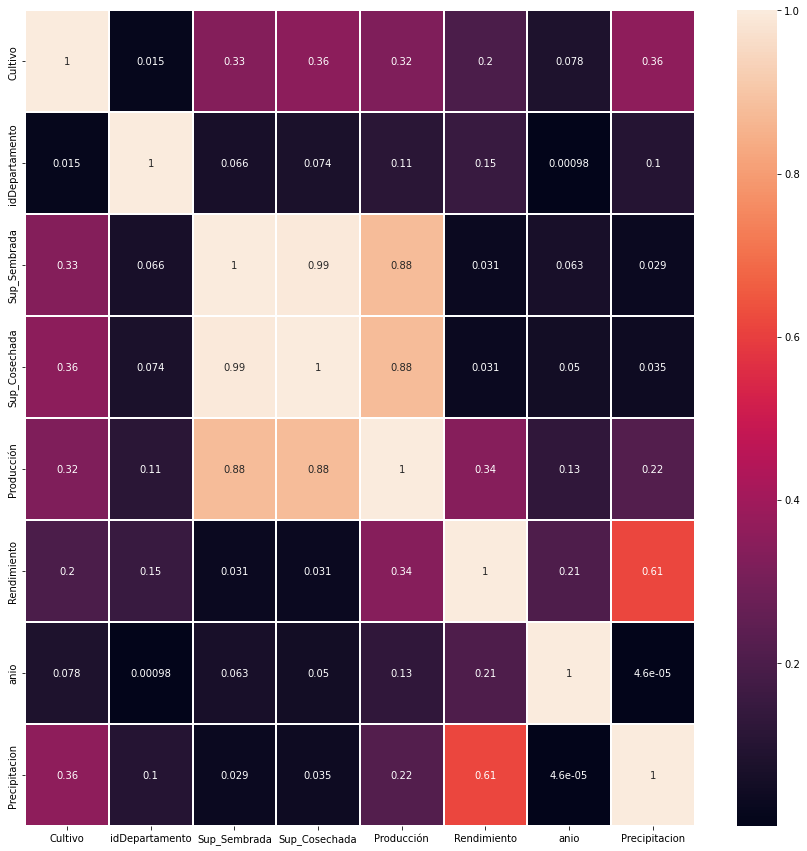

In [43]:
#hacemos un heat map para ver si hay correlaciones entre algunas de las columnas
plt.figure(figsize=(15,15))
cor=df_data.corr()
sns.heatmap(cor, annot=True, linewidths=2)
plt.show()

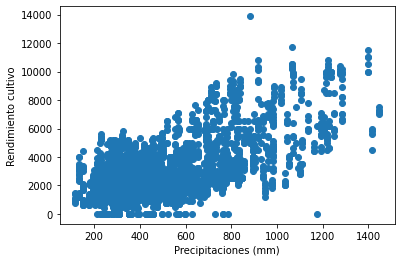

In [44]:
# Como nuestra busqueda se centra en intentar ver la relacion entre las precipitaciones y el rendimiento 
# vemos su relacion en grafico
plt.scatter(df_data["Precipitacion"], df_data["Rendimiento"])
plt.xlabel("Precipitaciones (mm)")
plt.ylabel("Rendimiento cultivo")
plt.show()

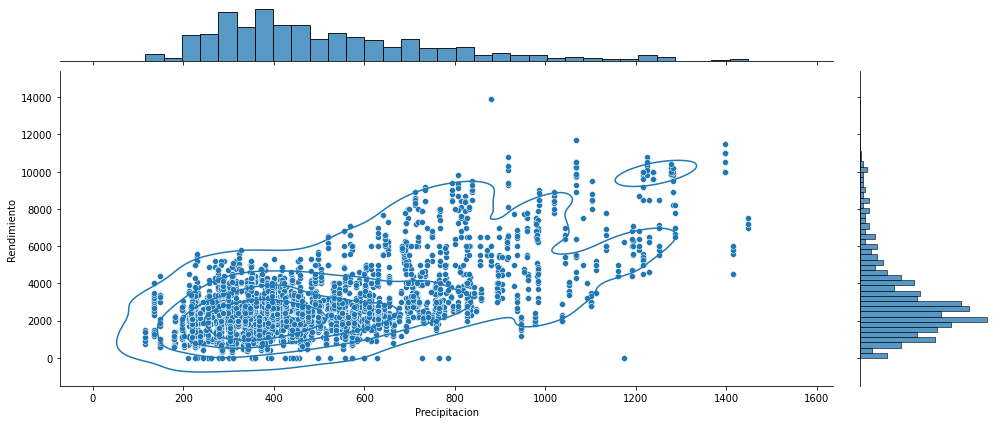

In [45]:
#hacemos un joinplot para ver mejor como se distribuyen las variables rendimiento y precipitaciones
jointplot=sns.jointplot(data=df_data, x="Precipitacion", y ="Rendimiento")
jointplot.plot_joint(sns.kdeplot, levels=5)
jointplot.fig.set_figwidth(15)

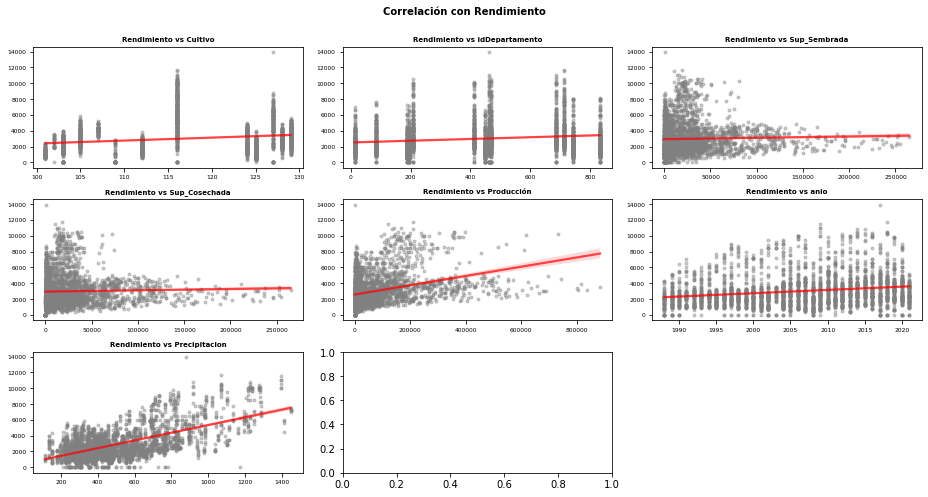

In [48]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 7))
axes = axes.flat
columnas_numeric = df_data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Rendimiento')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df_data[colum],
        y           = df_data['Rendimiento'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Rendimiento vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter
    axes[i].xaxis.set_major_formatter
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Rendimiento', fontsize = 10, fontweight = "bold");

In [51]:
#Definimos nuestra variable objetivo y separamos el Dataset para el entrenamiento
X = df_data.drop("Rendimiento", axis=1)
y=df_data.Rendimiento

In [52]:
#importamos el train test split y separamos el dataset para entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)